In [10]:
import requests
try:
    r = requests.get("https://api.spotify.com")
    print("Status:", r.status_code)
except Exception as e:
    print("Error:", e)

Status: 200


In [1]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id="Your_Client_Id",
    client_secret="Your_Client_Secret",
    redirect_uri="http://127.0.0.1:8000/callback",
    scope="user-top-read"
))

### Spotify API Time Ranges

| Parameter    | Time Span Covered           | Description / Use Case                                            |
|--------------|----------------------------|------------------------------------------------------------------|
| `short_term` | Last 4 weeks (~1 month)     | User's top tracks/artists from the past month                    |
| `medium_term`| Last 6 months (~6 months)   | User's top tracks/artists from the past half-year                |
| `long_term`  | Several years (~years/all)  | User's top tracks/artists over several years (Spotify account history) |

---

These parameters are used with the `time_range` option in Spotify API calls such as:

In [12]:
results = sp.current_user_top_tracks(limit=50, time_range='medium_term')
tracks = results['items']
print(f"Fetched {len(tracks)} top tracks.")

print("Your Top 50 Tracks:")
for idx, item in enumerate(results['items'], 1):
    print(f"{idx}. {item['name']} — {item['artists'][0]['name']}")

Fetched 50 top tracks.
Your Top 50 Tracks:
1. Reflections — The Neighbourhood
2. Baila Conmigo (with Rauw Alejandro) — Selena Gomez
3. HIGHEST IN THE ROOM — Travis Scott
4. Why'd You Only Call Me When You're High? — Arctic Monkeys
5. Kamikaze — Nanku
6. Money Trees — Kendrick Lamar
7. X (feat. Maluma & Ozuna) - Remix — Nicky Jam
8. Mask Off — Future
9. All The Stars (with SZA) — Kendrick Lamar
10. Swim — Chase Atlantic
11. The Less I Know The Better — Tame Impala
12. Gata Only — FloyyMenor
13. Chuttamalle (From "Devara Part 1") — Shilpa Rao
14. Sweater Weather — The Neighbourhood
15. So High — Doja Cat
16. Beggin' — Måneskin
17. sdp interlude — Travis Scott
18. Old Town Road (feat. Billy Ray Cyrus) - Remix — Lil Nas X
19. Brotherhood (Valmiki Chamar) — Baidh
20. 4AM In NY (feat. Anajah) — bLAck pARty
21. La La La — Naughty Boy
22. BIRDS OF A FEATHER — Billie Eilish
23. I Feel It Coming — The Weeknd
24. Unforgettable — French Montana
25. Too Many Nights (feat. Don Toliver & with Future)

In [13]:
genres = []
popularities = []
track_names = []

for track in tracks:
    # Safely check for artist info
    if 'artists' in track and track['artists']:
        artist_id = track['artists'][0]['id']
        try:
            artist = sp.artist(artist_id)
            artist_genres = artist.get('genres', [])
            # Append genres as a single string (e.g., "pop, rock") per track
            genres.append(", ".join(artist_genres) if artist_genres else 'Unknown')
        except Exception as e:
            print(f"Error fetching artist {artist_id}: {e}")
            genres.append('Unknown')
    else:
        genres.append('Unknown')
    
    # Collect popularity and track name (1 entry per track)
    popularities.append(track.get('popularity', 0))
    track_names.append(track.get('name', 'Unknown'))

df = pd.DataFrame({
    'Track': track_names,
    'Genres': genres,
    'Popularity': popularities
})
df.head()

,Track,Genres,Popularity
0,Reflections,Unknown,84
1,Baila Conmigo (with Rauw Alejandro),Unknown,68
2,HIGHEST IN THE ROOM,rap,85
3,Why'd You Only Call Me When You're High?,"indie, garage rock",87
4,Kamikaze,"desi hip hop, hindi indie, hindi hip hop, indi...",63


In [4]:
top_artists = sp.current_user_top_artists(limit=10, time_range='medium_term')['items']

artist_data = []
for artist in top_artists:
    artist_data.append({
        'Artist Name': artist['name'],
        'Genres': ", ".join(artist['genres']),
        'Popularity': artist['popularity'],
        'Spotify URL': artist['external_urls']['spotify']
    })

artist_df = pd.DataFrame(artist_data)
artist_df.head()

,Artist Name,Genres,Popularity,Spotify URL
0,The Weeknd,,96,https://open.spotify.com/artist/1Xyo4u8uXC1ZmM...
1,Kendrick Lamar,"hip hop, west coast hip hop",95,https://open.spotify.com/artist/2YZyLoL8N0Wb9x...
2,Travis Scott,rap,93,https://open.spotify.com/artist/0Y5tJX1MQlPlqi...
3,The Neighbourhood,,85,https://open.spotify.com/artist/77SW9BnxLY8rJ0...
4,Don Toliver,,87,https://open.spotify.com/artist/4Gso3d4CscCijv...


In [5]:
album_data = []
for track in tracks:
    album = track['album']
    album_data.append({
        'Album Name': album['name'],
        'Artist': ", ".join([a['name'] for a in album['artists']]),
        'Release Date': album['release_date'],
        'Total Tracks': album['total_tracks'],
        'Album Type': album['album_type'],
        'Spotify URL': album['external_urls']['spotify']
    })

album_df = pd.DataFrame(album_data)
album_df.head()

,Album Name,Artist,Release Date,Total Tracks,Album Type,Spotify URL
0,Hard To Imagine The Neighbourhood Ever Changing,The Neighbourhood,2018-11-02,21,album,https://open.spotify.com/album/0ODLCdHBFVvKwJG...
1,Revelación - EP,Selena Gomez,2021-03-12,7,single,https://open.spotify.com/album/2jGa3OwXatFYQAI...
2,HIGHEST IN THE ROOM,Travis Scott,2019-10-04,1,single,https://open.spotify.com/album/2uDTi1PlpSpvAv7...
3,AM,Arctic Monkeys,2013-09-09,12,album,https://open.spotify.com/album/78bpIziExqiI9qz...
4,Hoes Headquarters,Nanku,2023-11-27,5,single,https://open.spotify.com/album/0xEFFt4I5dpXLGT...


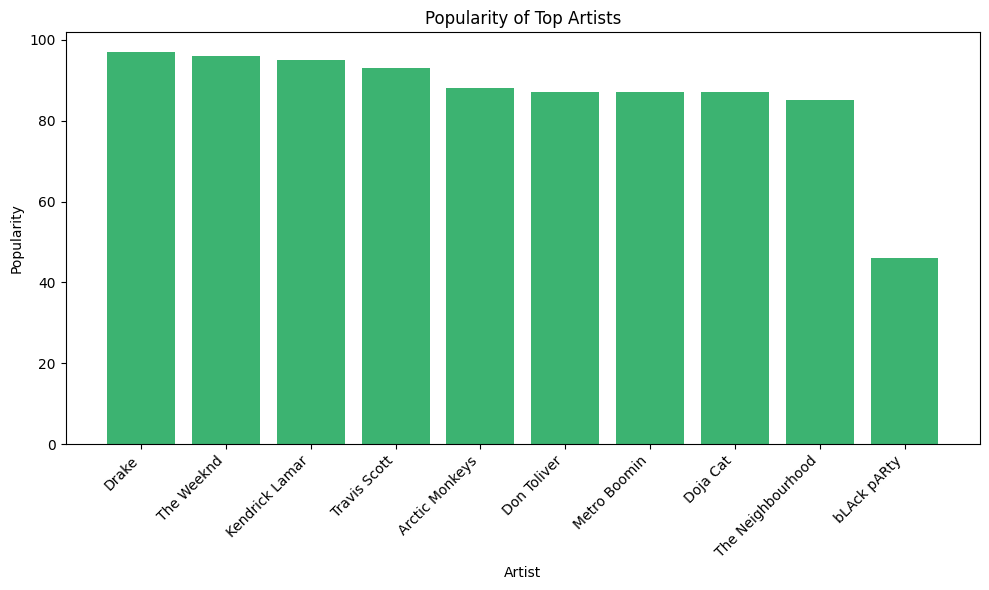

In [6]:
artist_df = artist_df.sort_values(by='Popularity', ascending=False)
plt.figure(figsize=(10,6))
plt.bar(artist_df['Artist Name'], artist_df['Popularity'], color='mediumseagreen')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.title('Popularity of Top Artists')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

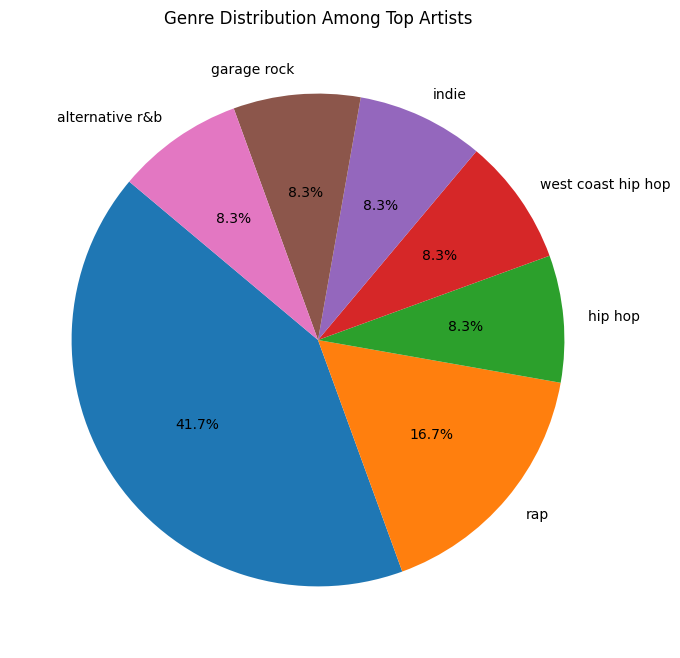

In [7]:
genres_exploded = artist_df['Genres'].str.split(', ').explode()
top_genres = genres_exploded.value_counts().head(8)
plt.figure(figsize=(8,8))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=140)
plt.title('Genre Distribution Among Top Artists')
plt.show()

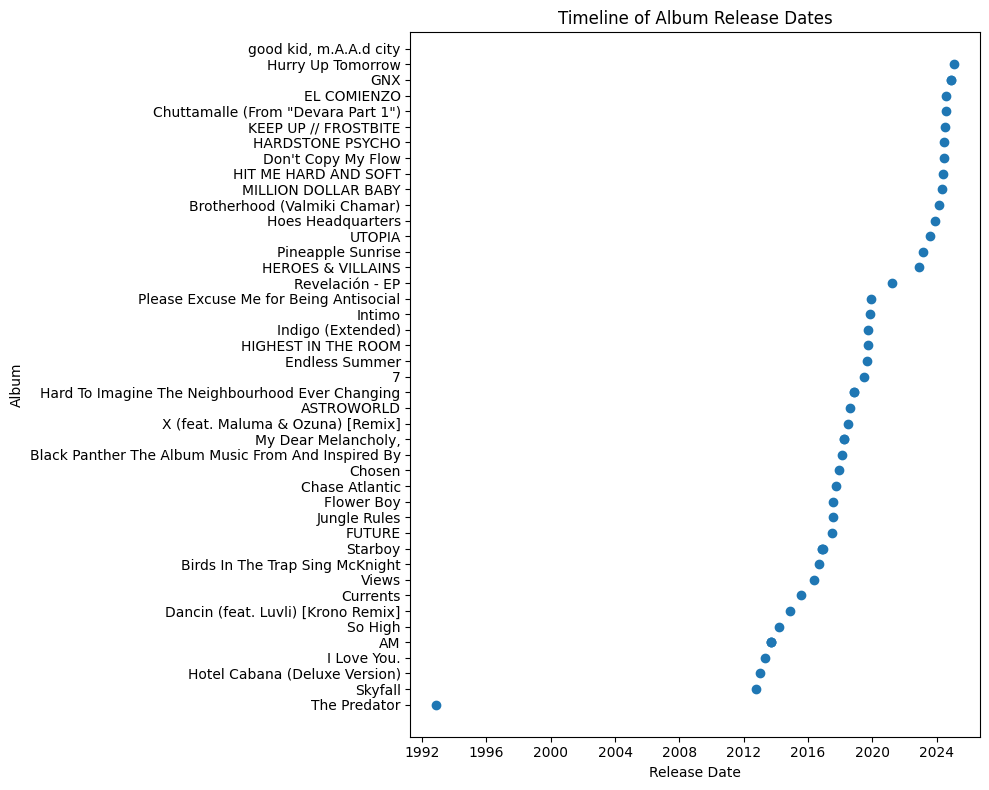

In [8]:
album_df['Release Date'] = pd.to_datetime(album_df['Release Date'], errors='coerce')
album_df = album_df.sort_values('Release Date')
plt.figure(figsize=(10,8))
plt.plot(album_df['Release Date'], album_df['Album Name'], 'o')
plt.xlabel('Release Date')
plt.ylabel('Album')
plt.title('Timeline of Album Release Dates')
plt.tight_layout()
plt.show()

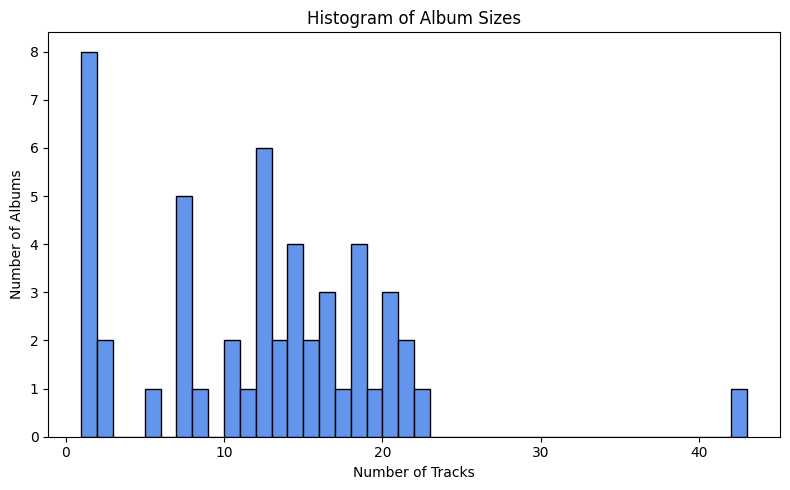

In [9]:
plt.figure(figsize=(8,5))
plt.hist(album_df['Total Tracks'].dropna(), 
         bins=range(1, album_df['Total Tracks'].max() + 2), 
         edgecolor='black', 
         color='cornflowerblue')
plt.xlabel('Number of Tracks')
plt.ylabel('Number of Albums')
plt.title('Histogram of Album Sizes')
plt.tight_layout()
plt.show()